## Converting into Transactional Datasets
- Microarray are matrices of data. Each row of a matrix represents a gene, while each column represent an asssay.
- To perform association rule learning, the data needs to be converted into transactional datasets.
- Can be done by transposing the data matrix.
- Each row is an assay in a transactional dataset
- Each 'transactional' has a different number of genes.
### Normalization:
- Each log-scaled gene expression level is converted into a ternary item.
- if the level exceeds the ***positive threshold***, and item ***+G*** replaces the correspoinding expression level where ***G*** is the gene number.
- if the log-scaled expression level is less than ***negative threshold***, it will be replaced by ***-G***.

In [80]:
import pandas as pd
from sklearn import preprocessing as ps

In [81]:
dfi = pd.read_csv("data/log_scaled_data.csv")
geneNames = dfi['GeneNames']
print(geneNames)
col = dfi.columns.drop(['GeneNames'])
# print(col)
df = dfi.drop(['GeneNames'], axis=1)
df.head(10)


0    x67699
1    r70790
2    l11706
3    t90549
4    d17390
5    m33210
6    h18490
7    h40891
8    r77780
9    t49647
Name: GeneNames, dtype: object


,Assay0,Assay1,Assay2,Assay3,Assay4,Assay5,Assay6,Assay7,Assay8,Assay9,...,Assay29,Assay30,Assay31,Assay32,Assay33,Assay34,Assay35,Assay36,Assay37,Assay38
0,-0.944282,-0.328488,-0.592665,-0.367702,-0.779041,0.684363,-0.038282,0.418631,-5.002361,-1.235931,...,1.927259,0.369175,0.015416,-0.376526,0.134489,-0.804595,-0.319278,0.506556,-1.432269,-0.559504
1,-0.335652,-0.043699,-0.154433,-0.740432,-1.016444,1.672593,0.396394,-0.394074,-1.674198,-1.510015,...,1.725276,1.124073,0.338370,-0.135675,0.303181,-1.404619,0.061897,-1.556790,-3.725036,-1.248718
2,0.331631,-2.731293,-0.356201,-1.364901,0.427931,1.423995,-0.127598,1.077871,0.242082,-0.407001,...,1.339264,1.802791,1.596832,-0.350201,2.127648,1.543003,-0.019524,1.360057,-0.400739,0.730341
3,0.787892,1.269320,-0.382770,-0.072893,1.130284,-0.303253,0.000919,0.842729,-1.386311,-0.660546,...,2.037695,0.938170,0.953762,0.513326,0.670171,0.540413,0.509064,1.719415,0.223823,0.075165
4,-0.248325,-0.445293,-0.941693,-0.088963,0.509117,1.403259,-0.158395,-0.558544,-2.128481,-1.263406,...,1.485413,1.410358,0.723940,-0.089933,0.955796,-0.749940,0.115271,-0.401565,-0.270134,-0.798106
5,-2.189482,0.311963,0.303843,-1.727986,0.214259,1.291084,-0.161218,0.233449,-0.316372,-0.611102,...,-0.271204,0.743793,0.717301,-0.698373,-0.038155,-0.113015,0.010262,1.822679,-0.922816,-0.330685
6,-0.023314,-1.142509,0.084636,-1.174510,0.535491,2.454488,-1.247107,-0.421724,-0.585734,-1.644595,...,1.803429,2.071109,1.730836,0.251029,-0.045389,-2.377314,-1.254952,-3.294384,-1.144243,-2.937815
7,-0.643309,-1.470416,-1.037136,-1.158236,0.050844,1.503594,-1.377228,-0.436345,-1.011996,-0.915024,...,1.064988,1.496842,0.253132,0.309409,0.358965,-1.182098,-0.565023,-0.322325,-1.048357,-0.145270
8,1.353426,-1.022351,-2.125942,0.187969,0.305304,1.835499,-0.271911,0.551249,-0.921620,-2.445705,...,2.592995,1.569933,1.023394,1.149341,1.796358,0.545779,-0.156423,0.798041,-1.227440,-0.494459
9,0.302952,-0.618248,0.451433,0.071378,0.206627,1.334308,0.576463,1.942981,1.059600,0.109814,...,2.038793,2.272826,1.661937,-0.703155,1.494325,0.386859,0.832732,0.430304,-1.141260,0.467387


In [82]:
# Normalizing the data
transformer = ps.Normalizer(norm='l1').fit(df)
df = pd.DataFrame(transformer.transform(df))
# lst_sm = df[0].tolist()
# print(lst_sm)
# print(sum(lst_sm))
df.head(10)


,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-0.030697,-0.010678,-0.019266,-0.011953,-0.025325,0.022247,-0.001244,0.013609,-0.162616,-0.040177,...,0.062651,0.012001,0.000501,-0.012240,0.004372,-0.026156,-0.010379,0.016467,-0.046560,-0.018188
1,-0.009133,-0.001189,-0.004202,-0.020148,-0.027658,0.045512,0.010786,-0.010723,-0.045556,-0.041088,...,0.046946,0.030587,0.009207,-0.003692,0.008250,-0.038220,0.001684,-0.042361,-0.101360,-0.033978
2,0.009738,-0.080199,-0.010459,-0.040078,0.012565,0.041813,-0.003747,0.031650,0.007108,-0.011951,...,0.039325,0.052935,0.046888,-0.010283,0.062474,0.045307,-0.000573,0.039935,-0.011767,0.021445
3,0.023487,0.037838,-0.011410,-0.002173,0.033694,-0.009040,0.000027,0.025122,-0.041326,-0.019691,...,0.060744,0.027967,0.028432,0.015302,0.019978,0.016110,0.015175,0.051256,0.006672,0.002241
4,-0.007812,-0.014009,-0.029626,-0.002799,0.016017,0.044147,-0.004983,-0.017572,-0.066963,-0.039747,...,0.046732,0.044370,0.022775,-0.002829,0.030070,-0.023593,0.003626,-0.012633,-0.008498,-0.025109
5,-0.056706,0.008080,0.007869,-0.044753,0.005549,0.033438,-0.004175,0.006046,-0.008194,-0.015827,...,-0.007024,0.019264,0.018578,-0.018087,-0.000988,-0.002927,0.000266,0.047206,-0.023900,-0.008564
6,-0.000572,-0.028045,0.002078,-0.028831,0.013145,0.060250,-0.030613,-0.010352,-0.014378,-0.040370,...,0.044269,0.050839,0.042487,0.006162,-0.001114,-0.058356,-0.030805,-0.080867,-0.028088,-0.072114
7,-0.020898,-0.047766,-0.033691,-0.037625,0.001652,0.048844,-0.044739,-0.014175,-0.032875,-0.029724,...,0.034596,0.048625,0.008223,0.010051,0.011661,-0.038400,-0.018355,-0.010471,-0.034056,-0.004719
8,0.034671,-0.026190,-0.054461,0.004815,0.007821,0.047020,-0.006966,0.014121,-0.023609,-0.062652,...,0.066425,0.040217,0.026216,0.029443,0.046018,0.013981,-0.004007,0.020444,-0.031444,-0.012667
9,0.007837,-0.015994,0.011679,0.001847,0.005345,0.034519,0.014913,0.050265,0.027412,0.002841,...,0.052744,0.058798,0.042995,-0.018191,0.038658,0.010008,0.021543,0.011132,-0.029525,0.012091


<AxesSubplot:>

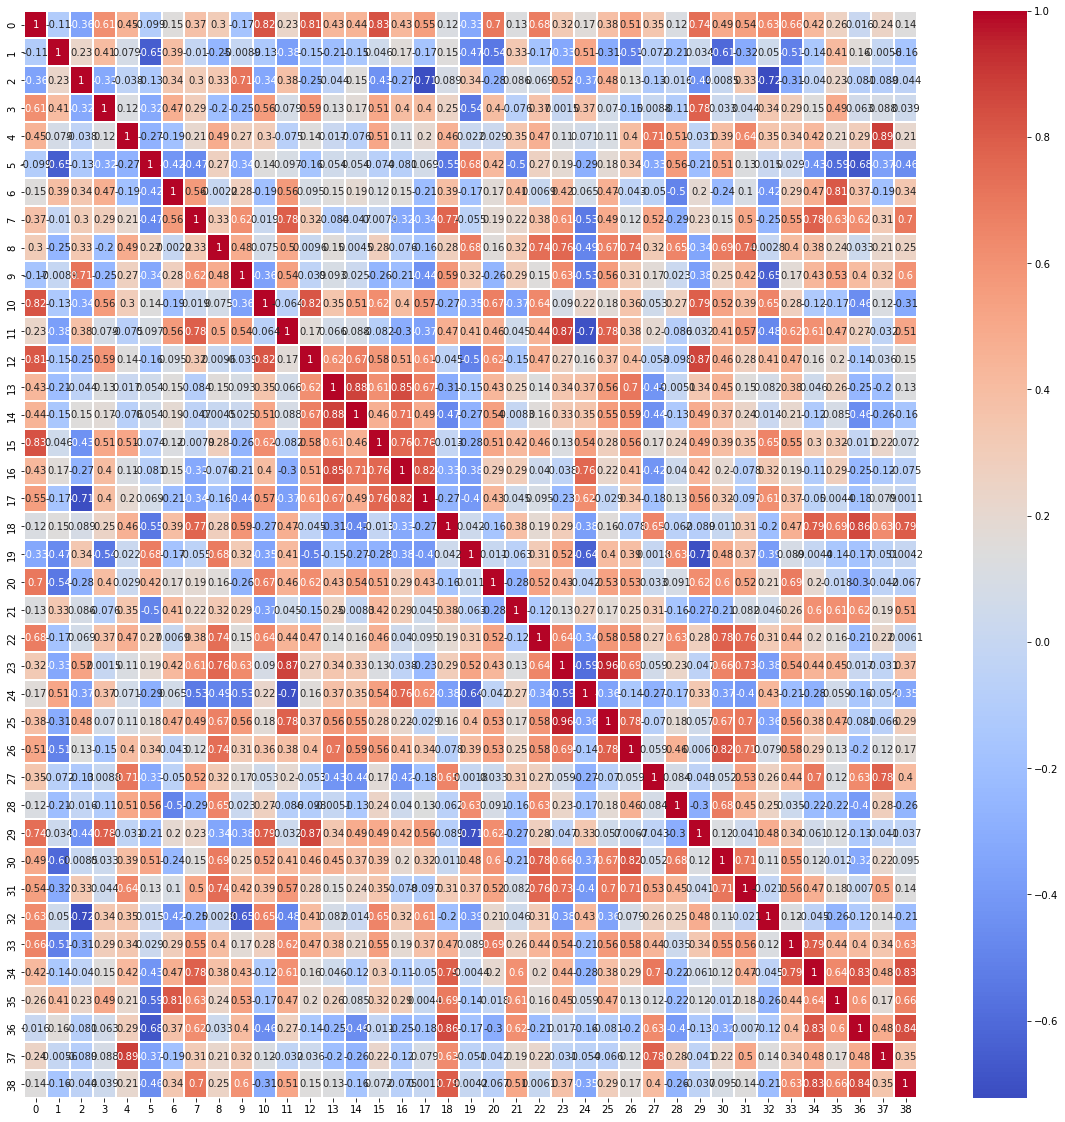

In [83]:
# Correlation analysis of the Normalized dataset.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
corrMat = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrMat, cmap='coolwarm', linewidth=0.4, annot=True)
# Correlation analysis is not needed.



In [88]:
binData = ps.Binarizer(threshold=0)
df = pd.DataFrame(binData.transform(df, copy=True))
df.columns = col

# changing the datatype of the dataframe
df = df.astype(int)
data = df.transpose()
# setting the column name as the name of the genes and Upper-Casing the Gene Names.
data.columns = geneNames.str.upper()
data.to_csv('data/binarized_data.csv')
data.head()


d:\Program Files (x86)\miniconda3\envs\ml\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Binarizer was fitted without feature names
  warnings.warn(


GeneNames,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647
Assay0,0,0,1,1,0,0,0,0,1,1
Assay1,0,0,0,1,0,1,0,0,0,0
Assay2,0,0,0,0,0,1,1,0,0,1
Assay3,0,0,0,0,0,0,0,0,1,1
Assay4,0,0,1,1,1,1,1,1,1,1


In [89]:
bn = pd.read_csv('data/binarized_data.csv')
bn.head()
# this approach is like identifying the biomarkers responsible for the 'Tumor'

,Unnamed: 0,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647
0,Assay0,0,0,1,1,0,0,0,0,1,1
1,Assay1,0,0,0,1,0,1,0,0,0,0
2,Assay2,0,0,0,0,0,1,1,0,0,1
3,Assay3,0,0,0,0,0,0,0,0,1,1
4,Assay4,0,0,1,1,1,1,1,1,1,1


In [90]:
bn.describe().round(2)

,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647
count,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00
mean,0.31,0.49,0.72,0.69,0.49,0.36,0.49,0.41,0.67,0.82
std,0.47,0.51,0.46,0.47,0.51,0.49,0.51,0.50,0.48,0.39
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00
75%,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
